# 2.0: EXPLORATORY DATA ANALYSIS 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno 
import warnings
import sklearn

In [3]:
file_path = '../data/processed/processed_waterPollution.csv'

df_eda = pd.read_csv(file_path)

In [4]:
pd.set_option('display.max_columns', None)
df_eda.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,waterBodyIdentifier,Country,TerraMarineProtected_2016_2018,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,resultMeanValue_log1p,combustibleRenewables_2009_2014_log1p,PopulationDensity_log1p,gdp_log1p,TouristMean_1990_2020_log1p,VenueCount_log1p,netMigration_2011_2018_logmod,droughts_floods_temperature_yj,Start_Year,End_Year,Sampling_Duration_In_Year,resultUom_Desc
0,RW,CAS_14797-65-0,total,water,FRDR609,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.061387,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.632029,2009,2009,1,Nitrite (mg/L)
1,RW,CAS_14797-65-0,total,water,FRFR238,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.045674,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.632029,2009,2009,1,Nitrite (mg/L)
2,RW,EEA_3164-07-6,total,water,FRFR238,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,4.896787,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.632029,2009,2009,1,Mass Ratio
3,RW,CAS_14797-55-8,total,water,FRFR327C,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,2.531979,1.697053,4.814616,28.662794,18.080671,1.098612,11.235977,-0.632029,2009,2009,1,Nitrate (mg/L)
4,RW,EEA_3151-01-7,total,water,ES014MSPFES-014-NR-038-000-02-02,Spain,15.047884,49.0,8.0,3.0,14.0,15.0,9.0,2.0,0.0,16.84,0.187972,1.679577,4.550473,28.012541,17.746192,1.609438,-10.598040,2.105301,2009,2009,1,Millimoles per Liter


We begin by exploring the structure of the dataset and identifying key identifiers and pollution trends over time.


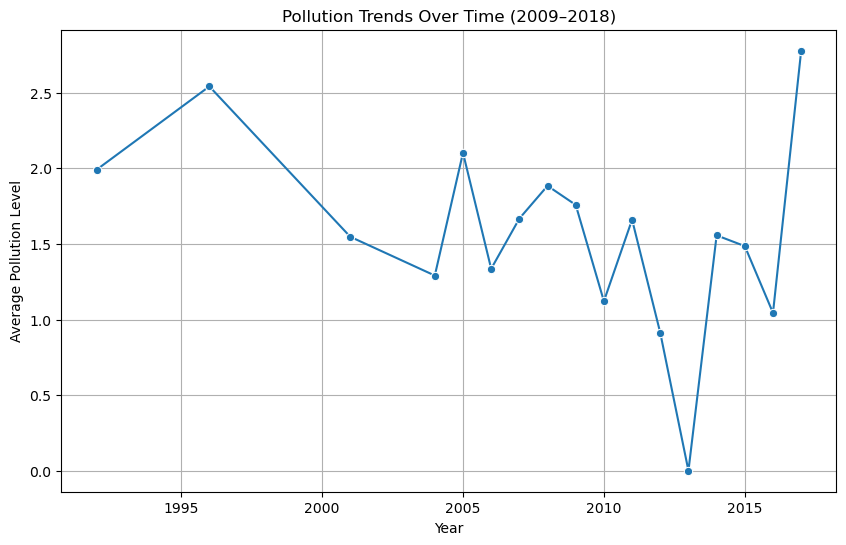

In [6]:
pollution_trends = df_eda.groupby('Start_Year')['resultMeanValue_log1p'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=pollution_trends.index, y=pollution_trends.values, marker='o')
plt.title('Pollution Trends Over Time (2009–2018)')
plt.xlabel('Year')
plt.ylabel('Average Pollution Level')
plt.grid(True)
plt.show()

We visualize the average pollution level from 1992 to 2018 using `resultMeanValue_log`. This gives insight into whether pollution levels have improved or worsened over time.
We observed some flunctuations pattern but the worst on is in between 2013 and 2014. And there is a sharp increase in the recent years, which may suggest water quality improvements.


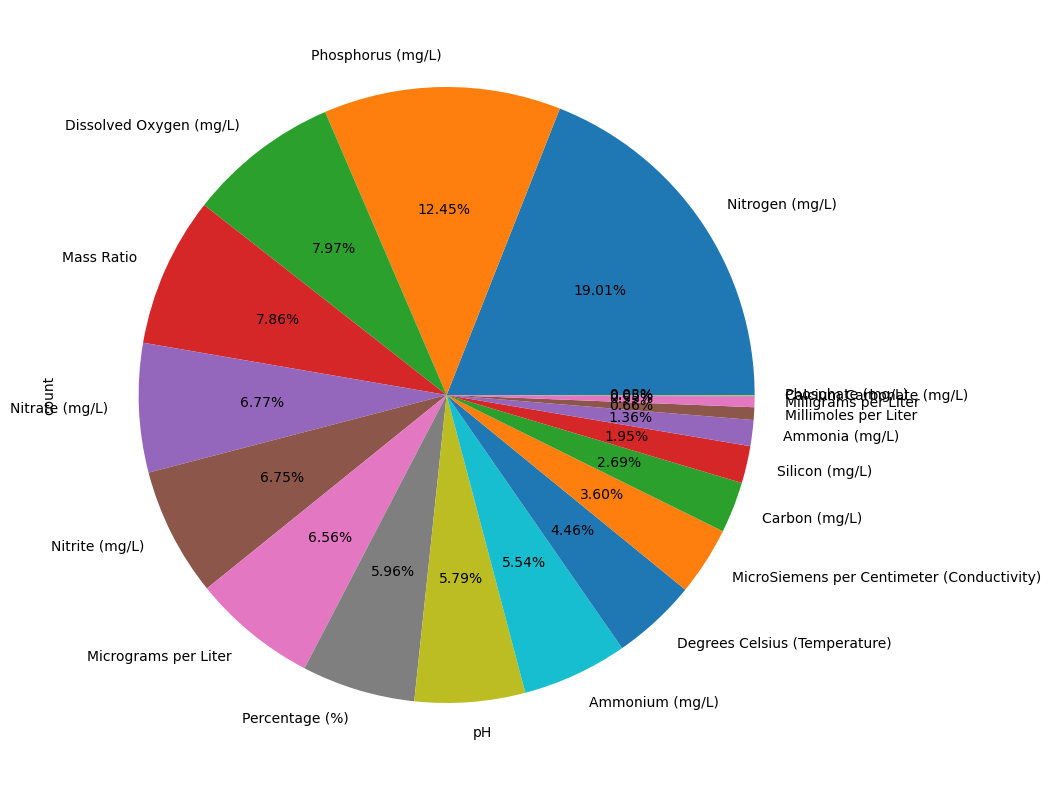

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))  # Increase figsize to (10, 10) or any desired size
df_eda["resultUom_Desc"].value_counts().plot.pie(autopct="%1.2f%%", ax=ax)
plt.show()

**Histogram**

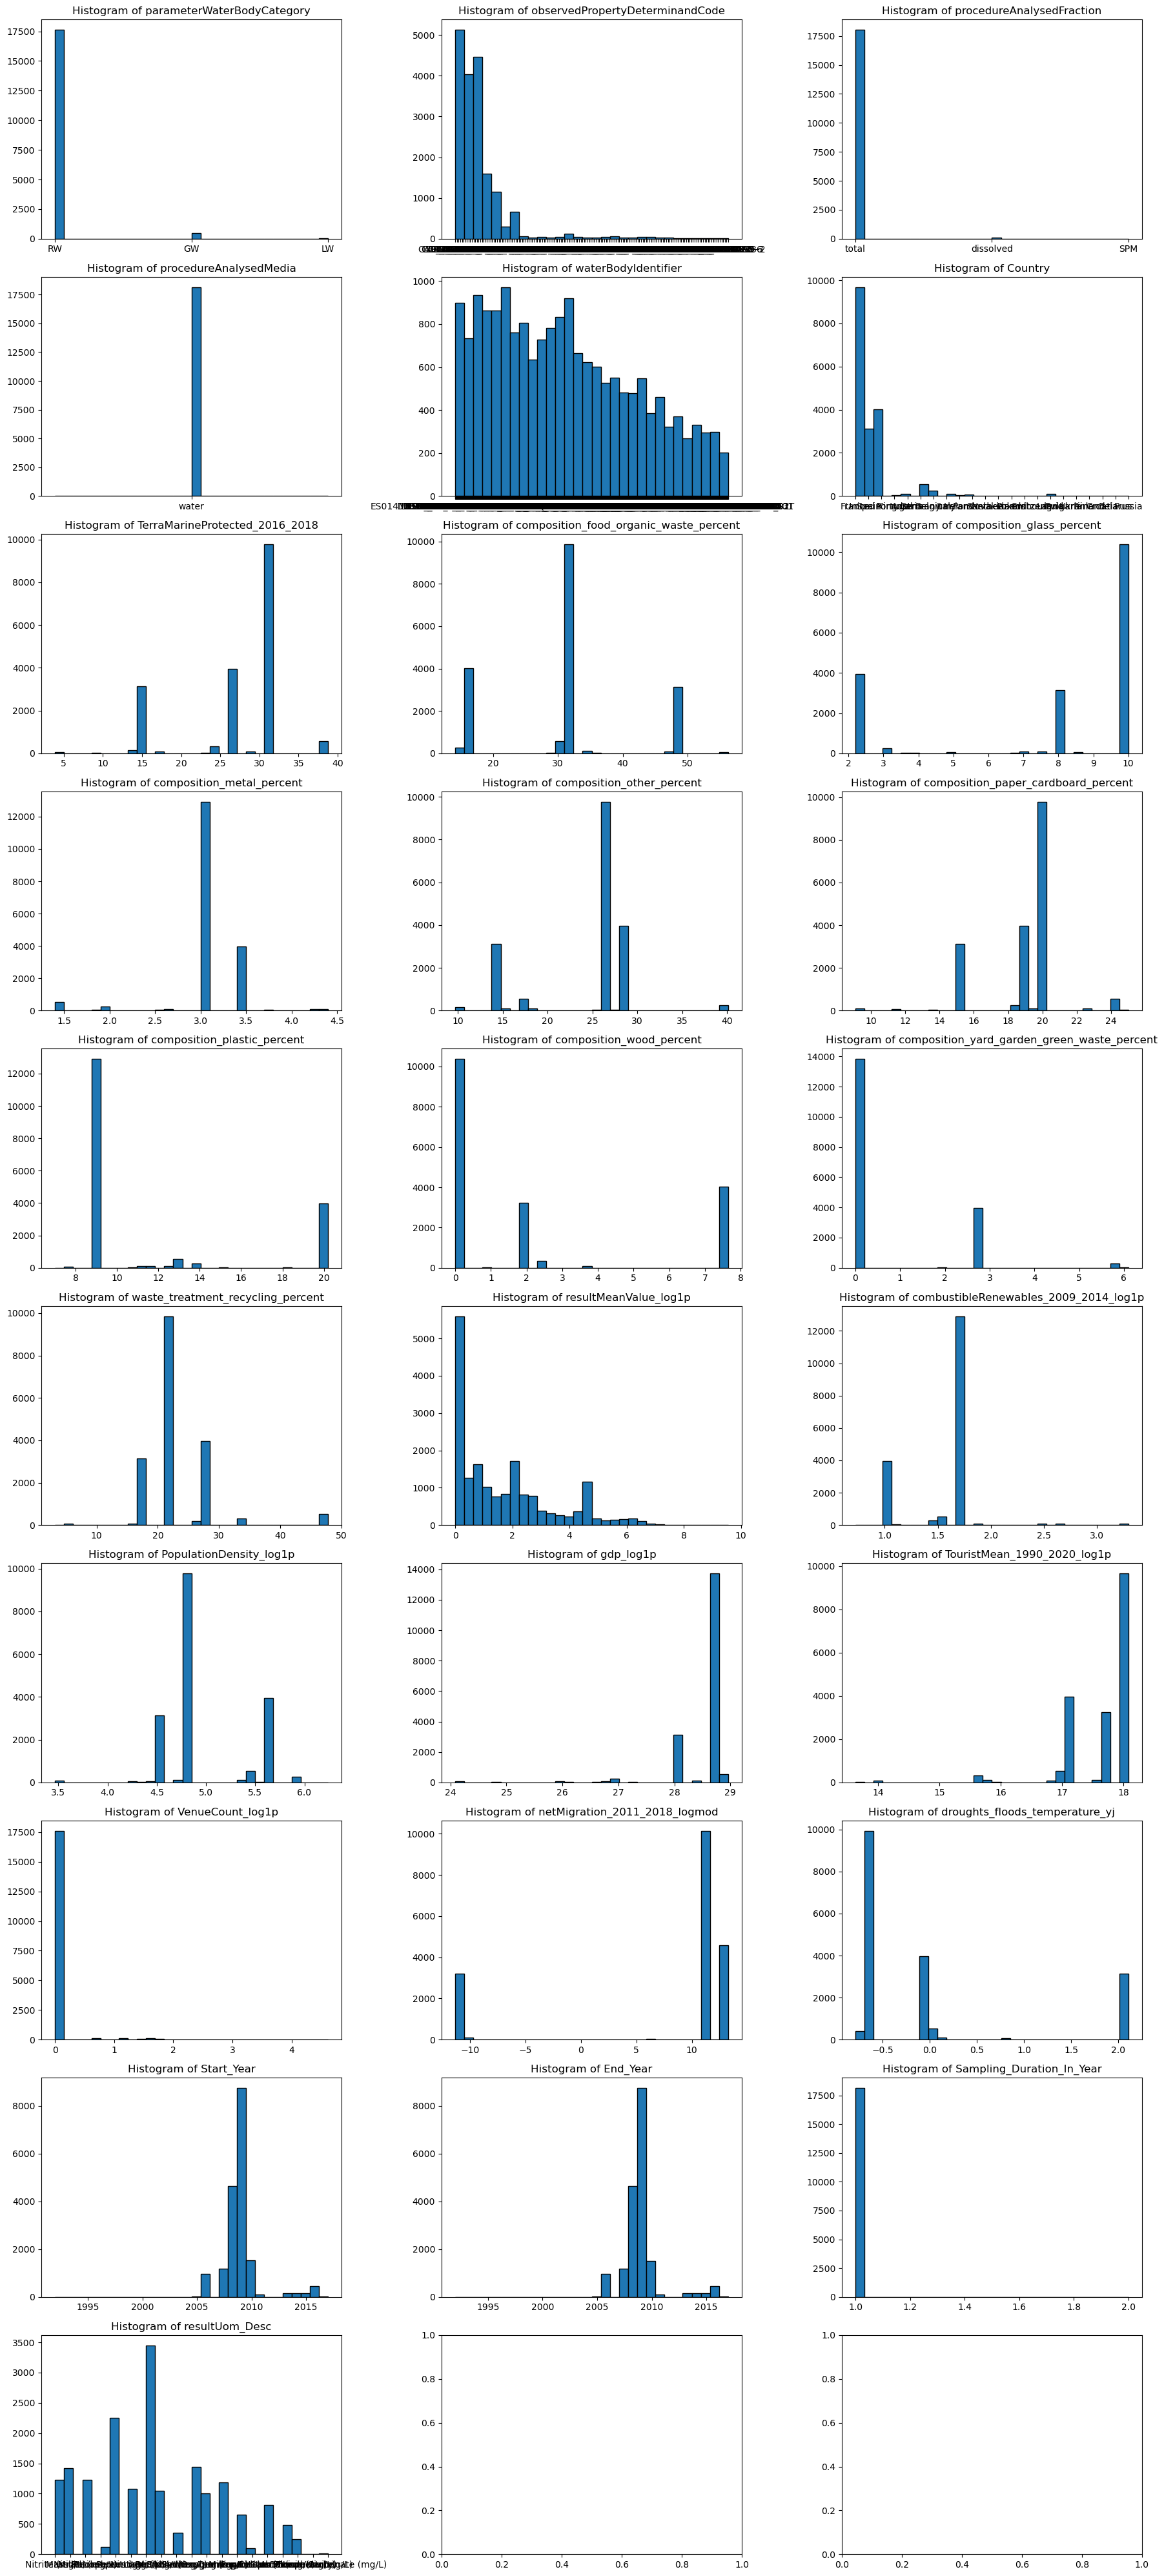

In [8]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(18, 40))
axes = axes.flatten()

for i, col in enumerate(df_eda.columns[:len(axes)]):
    axes[i].hist(df_eda[col], bins=30, edgecolor="k")
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

## Analyzing correlation to choose selected features for clustering

**Correlation Heatmap**

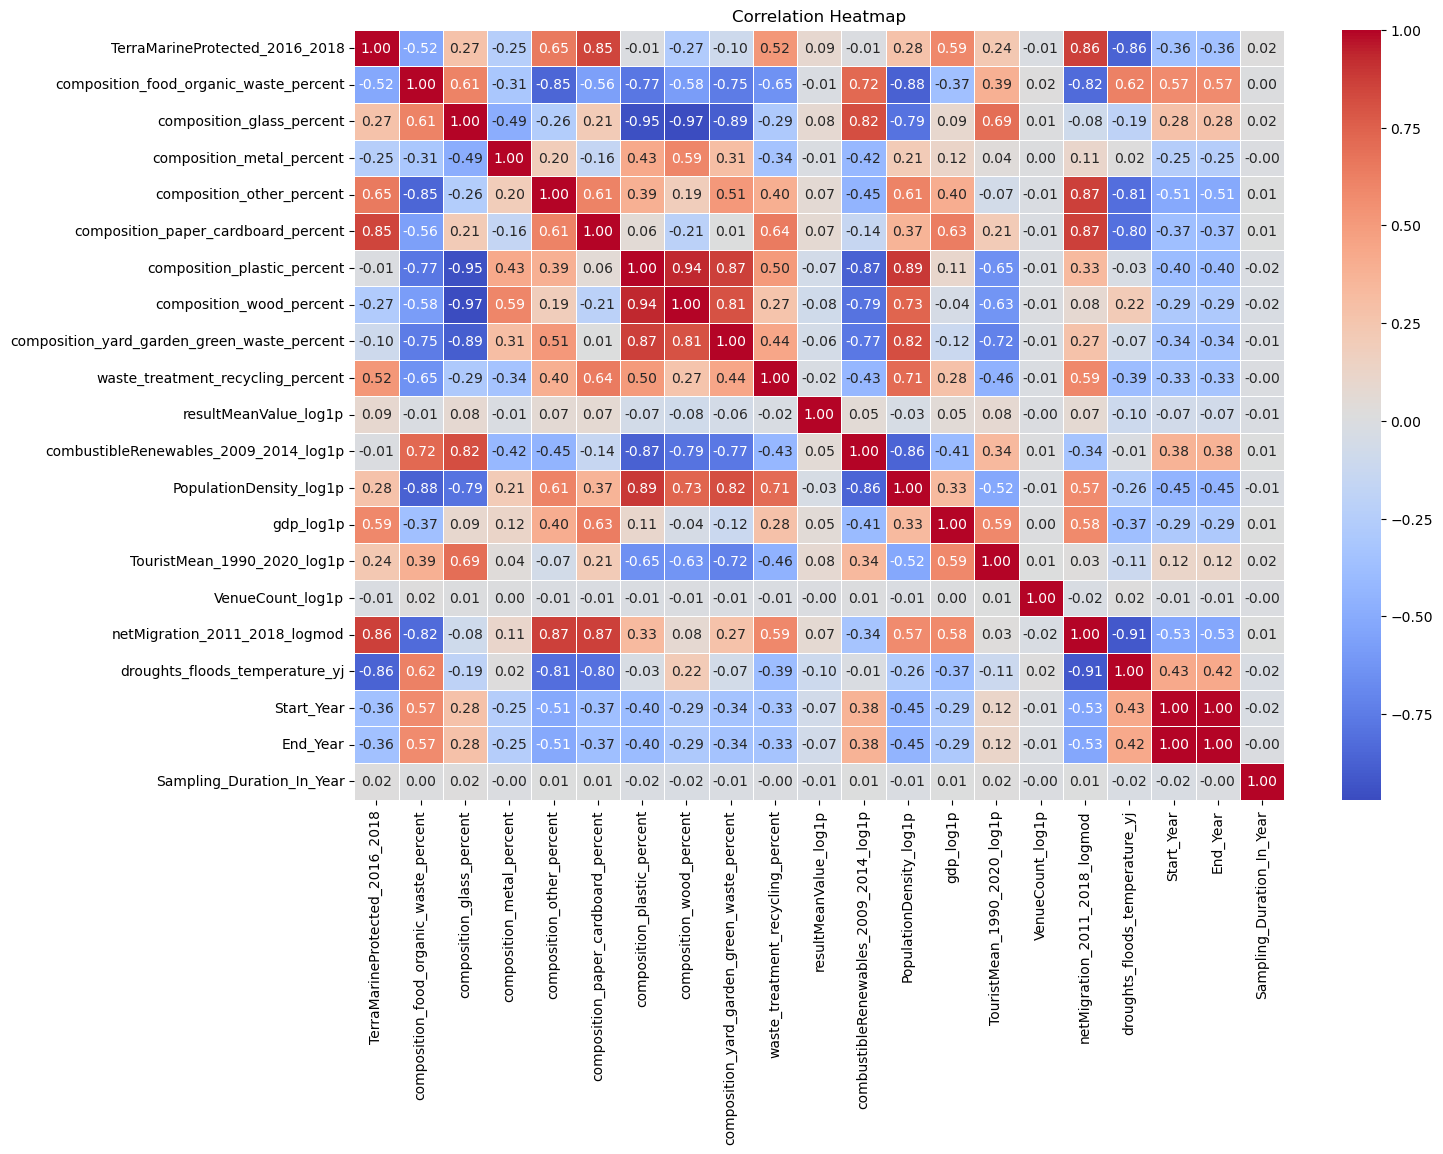

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_eda.select_dtypes(include=['number']).corr(), 
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
# --- Define the selected feature list ---
selected_clustering_features = [
    'composition_food_organic_waste_percent',
    'composition_glass_percent',
    #'composition_metal_percent',
    #'composition_other_percent',
    'composition_paper_cardboard_percent',
    'composition_plastic_percent',
    #'composition_wood_percent',
    'combustibleRenewables_2009_2014_log1p',
    'composition_yard_garden_green_waste_percent',
    #'waste_treatment_recycling_percent',
    'resultMeanValue_log1p',
    'PopulationDensity_log1p',
    'TerraMarineProtected_2016_2018',
    #'droughts_floods_temperature_yj',
    #'TouristMean_1990_2020_log1p',
    'netMigration_2011_2018_logmod',
    'Start_Year'
    #'End_Year'
]

print("--- Starting Workflow selected clustering features ---")

--- Starting Workflow selected clustering features ---


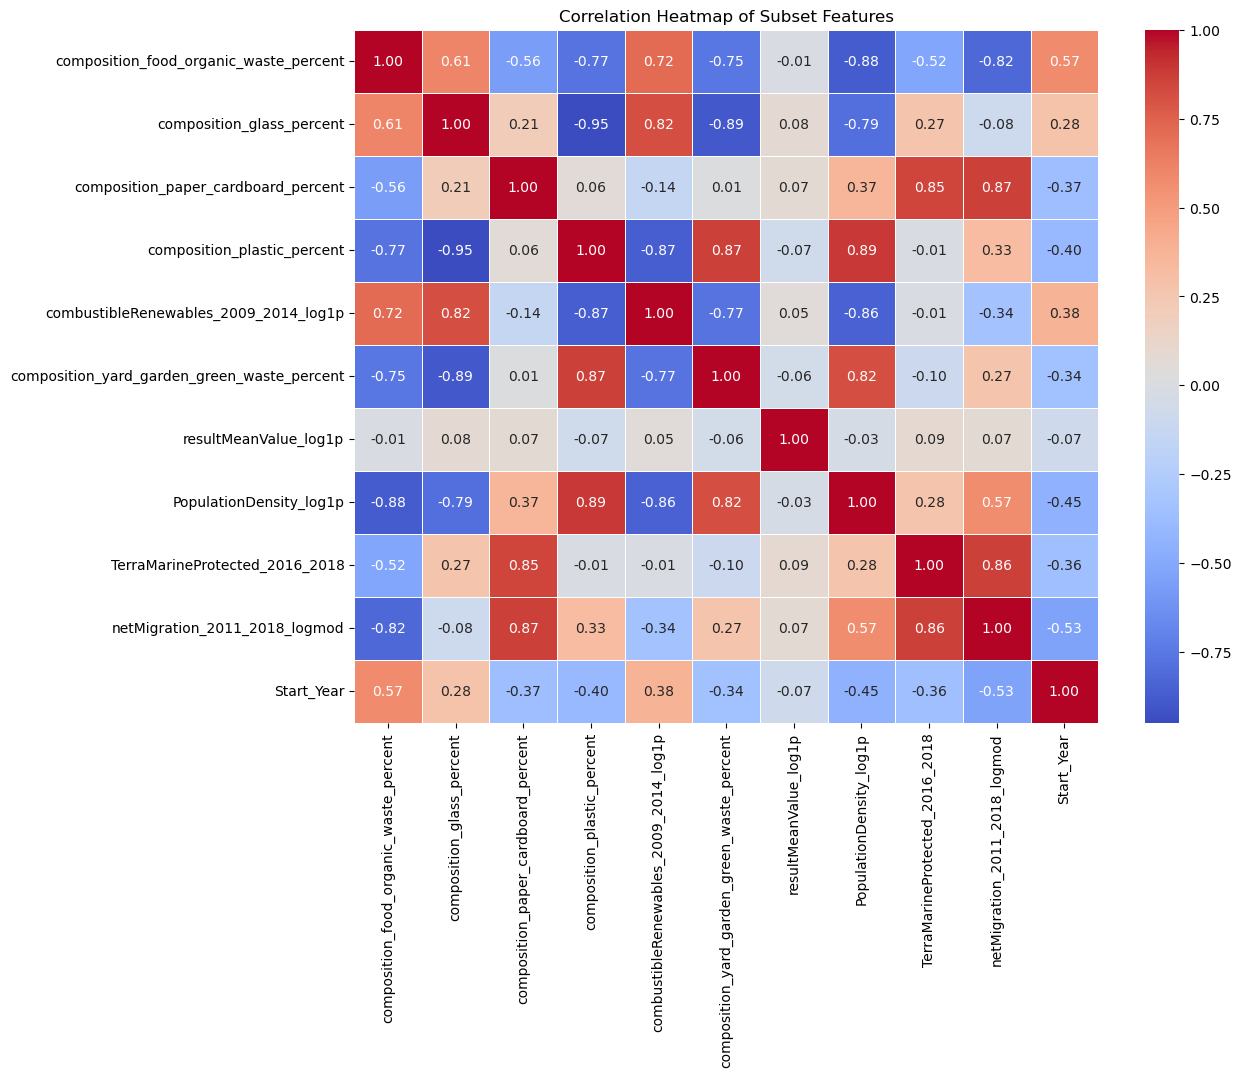

In [12]:
# Assuming your DataFrame is named df_eda
cluster_df = df_eda[selected_clustering_features]

plt.figure(figsize=(12, 9))  # Adjust figure size as needed for fewer features
sns.heatmap(cluster_df.corr(),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Subset Features')
plt.show()

**All Selected features for clustering are:**

- composition_food_organic_waste_percent
- composition_glass_percent
- composition_paper_cardboard_percent
- composition_plastic_percent
- combustibleRenewables_2009_2014_log1p
- composition_yard_garden_green_waste_percent
- resultMeanValue_log1p
- PopulationDensity_log1p
- TerraMarineProtected_2016_2018
- netMigration_2011_2018_logmod
- Start_Year